In [67]:
import time
import pickle
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

## Embedding visualization TSNE

In [68]:
# Horizental embedding
horiz_model = Word2Vec.load("models/diag2vec_1_150.pkl")

In [69]:
horiz_embed_model.wv.most_similar(['J181', 'N390', 'S7200', 'I639', 'J189', 'R296', 'A419', 'N179', 'F03X',
       'I500'])[0]#J181 is the most popular disease related to Dtoc

(u'J677', 0.792870044708252)

In [76]:
def tsne_plot(model, vocabs):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    
    for word in vocabs:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=5, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(12, 12)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [77]:
# Plot the most similar diagnoses of each primary diagnose of Dtoc
def top_similar_vacabs(model, diags):

    top_similarities = []

    for diag in diags:
        sims = model.most_similar(diag)
        for sim in sims:
            top_similarities.append(sim[0])

    vocabs = diags+top_similarities
    return vocabs

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


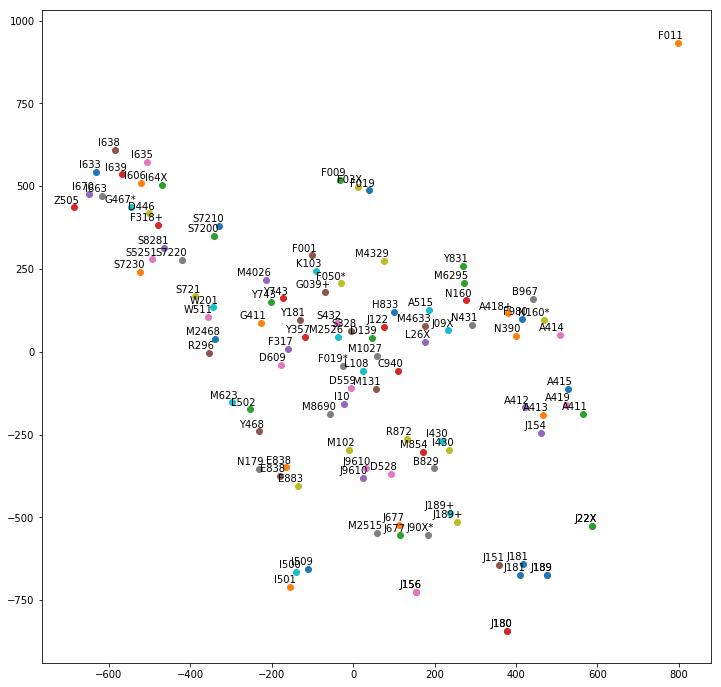

In [78]:
vocabs = top_similar_vacabs(horiz_model, ['J181', 'N390', 'S7200', 'I639', 'J189', 'R296', 'A419', 'N179', 'F03X',
           'I500'])
tsne_plot(horiz_model, vocabs)

In [80]:
# Longitutional embedding
longi_model = Word2Vec.load("models/seq2vec_1_150.pkl")

In [81]:
longi_model.most_similar('J181')

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[(u'S2720', 0.7052844166755676),
 (u'E169', 0.7010078430175781),
 (u'R090', 0.6917665004730225),
 (u'J432', 0.688801109790802),
 (u'J9601', 0.6852083206176758),
 (u'S212', 0.6813784837722778),
 (u'M102', 0.6812260746955872),
 (u'N430', 0.6806085109710693),
 (u'G211', 0.6803620457649231),
 (u'J154', 0.6794084906578064)]

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


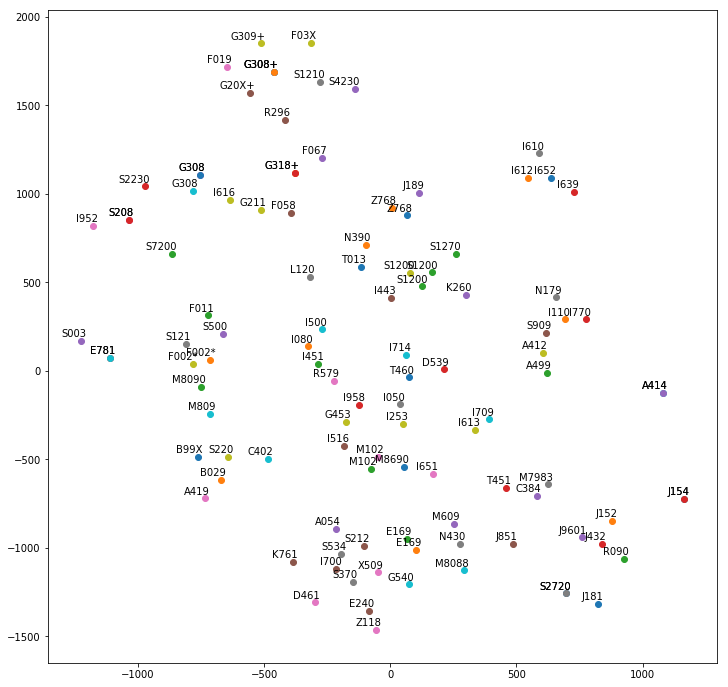

In [82]:
vocabs = top_similar_vacabs(longi_model, ['J181', 'N390', 'S7200', 'I639', 'J189', 'R296', 'A419', 'N179', 'F03X',
           'I500'])
tsne_plot(longi_model, vocabs)

## ROC-AUC curve

In [8]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc(fpr, tpr):
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr,
            lw=1.0, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=1.0, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [2]:
import _pickle as pickle

In [4]:
roc_result = pickle.load(open('dataset/roc_CNN.pkl', 'rb'))

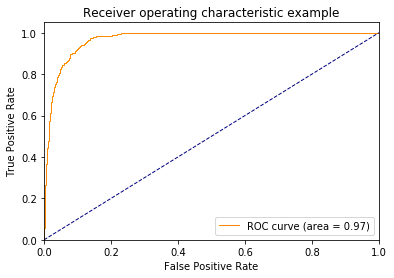

In [9]:
plot_roc(roc_result['fpr'].values,roc_result['tpr'].values)

In [66]:
roc_result_150 = pickle.load(open('dataset/roc_CNN_150.pkl', 'rb'))
plot_roc(roc_result['fpr'].values,roc_result['tpr'].values)

ValueError: unsupported pickle protocol: 4

In [65]:
roc_result_150 = pickle.load(open('dataset/roc_LR_150.pkl', 'rb'))
plot_roc(roc_result['fpr'].values,roc_result['tpr'].values)

ValueError: unsupported pickle protocol: 4